# We don’t need no labels - Sample notebook 

In this notebook we are showing how one can use the folktables data and our implementations of the performance estimation methods to re-produce our results.

In [1]:
import pandas as pd
import nannyml as nml
import matplotlib.pyplot as plt
from create_datasets.create import create_employment_dataset
from estimation_methods.constant import CONSTANT
from estimation_methods.rt import ReverseTraining
from estimation_methods.atc import ATC
from estimation_methods.iw import ImportanceWeighting
from estimation_methods.doc import DOC

In [2]:
import warnings

warnings.simplefilter(action="ignore", category=UserWarning)

## Preparation

### Load dataset and split into reference and analysis

In [3]:
create_employment_dataset(["CO"], 2015)

LogisticRegression
LGBMClassifier
RandomForestClassifier
Storing: employment-2015_2016_2017_2018-CO.csv


In [4]:
data = pd.read_csv("datasets/employment-2015_2016_2017_2018-CO.csv")
data.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,...,SEX,RAC1P,y_true,LogisticRegression_y_pred,LogisticRegression_y_pred_proba,LGBMClassifier_y_pred,LGBMClassifier_y_pred_proba,RandomForestClassifier_y_pred,RandomForestClassifier_y_pred_proba,partition
0,31.0,19.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,...,1.0,1.0,1,1,0.928497,1,0.930547,1,0.753286,train
1,28.0,19.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,1.0,...,2.0,1.0,1,1,0.870975,1,0.624340,1,0.667111,train
2,67.0,22.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,...,2.0,1.0,0,1,0.532231,0,0.285812,0,0.377704,train
3,67.0,21.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,1.0,...,1.0,1.0,0,1,0.606427,0,0.457403,0,0.377599,train
4,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,1.0,2.0,...,1.0,1.0,0,0,0.007188,0,0.021834,0,0.000000,train


In [5]:
list(data.columns)

['AGEP',
 'SCHL',
 'MAR',
 'RELP',
 'DIS',
 'ESP',
 'CIT',
 'MIG',
 'MIL',
 'ANC',
 'NATIVITY',
 'DEAR',
 'DEYE',
 'DREM',
 'SEX',
 'RAC1P',
 'y_true',
 'LogisticRegression_y_pred',
 'LogisticRegression_y_pred_proba',
 'LGBMClassifier_y_pred',
 'LGBMClassifier_y_pred_proba',
 'RandomForestClassifier_y_pred',
 'RandomForestClassifier_y_pred_proba',
 'partition']

In [6]:
model_input_features = [
    'AGEP',
    'SCHL',
    'MAR',
    'RELP',
    'DIS',
    'ESP',
    'CIT',
    'MIG',
    'MIL',
    'ANC',
    'NATIVITY',
    'DEAR',
    'DEYE',
    'DREM',
    'SEX',
    'RAC1P',
]
# dataset has outputs from 3 trained models, we pick one to use
model_scores = "RandomForestClassifier_y_pred_proba"
model_predictions = "RandomForestClassifier_y_pred"

In [7]:
reference = data.loc[data.partition == "reference"][model_input_features + [model_scores, model_predictions, 'y_true']].reset_index(drop=True)
reference

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,RandomForestClassifier_y_pred_proba,RandomForestClassifier_y_pred,y_true
0,37.0,21.0,1.0,0.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,0.980000,1,1
1,43.0,23.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,1.0,6.0,0.910000,1,1
2,4.0,2.0,5.0,2.0,2.0,1.0,1.0,3.0,0.0,4.0,1.0,2.0,2.0,0.0,2.0,6.0,0.000000,0,0
3,1.0,0.0,5.0,2.0,2.0,1.0,1.0,3.0,0.0,4.0,1.0,2.0,2.0,0.0,1.0,6.0,0.000000,0,0
4,68.0,18.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.075595,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54566,66.0,17.0,3.0,0.0,2.0,0.0,1.0,1.0,3.0,4.0,1.0,2.0,2.0,2.0,1.0,1.0,0.471786,0,1
54567,40.0,21.0,1.0,0.0,2.0,0.0,1.0,3.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.637833,1,1
54568,38.0,16.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,0.880000,1,1
54569,64.0,16.0,2.0,0.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.290000,0,1


In [8]:
analysis = data.loc[data.partition == "analysis"][model_input_features + [model_scores, model_predictions, 'y_true']].reset_index(drop=True)
analysis

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,RandomForestClassifier_y_pred_proba,RandomForestClassifier_y_pred,y_true
0,34.0,23.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.873167,1,1
1,38.0,22.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.000000,1,1
2,28.0,21.0,5.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.000000,1,1
3,26.0,21.0,5.0,13.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.000000,1,1
4,74.0,21.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,0.074464,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111523,39.0,22.0,1.0,0.0,2.0,0.0,4.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,6.0,0.990000,1,1
111524,39.0,24.0,1.0,1.0,2.0,0.0,4.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,6.0,0.941667,1,1
111525,7.0,4.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,6.0,0.000000,0,0
111526,5.0,3.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,6.0,0.000000,0,0


### Compute realized performance for reference

In [9]:
perf = nml.PerformanceCalculator(
    y_pred_proba=model_scores,
    y_pred=model_predictions,
    y_true='y_true',
    problem_type='classification_binary',
    metrics=['roc_auc', 'f1', 'accuracy'],
    chunk_size=2000
)
perf.fit(reference)
perf_results = perf.calculate(analysis)

In [10]:
perf_results.filter(period='analysis').to_df().head()

chunk                                                        \
           key chunk_index start_index end_index start_date end_date   
0     [0:1999]           0           0      1999       None     None   
1  [2000:3999]           1        2000      3999       None     None   
2  [4000:5999]           2        4000      5999       None     None   
3  [6000:7999]           3        6000      7999       None     None   
4  [8000:9999]           4        8000      9999       None     None   

                                        roc_auc            ...             f1  \
     period targets_missing_rate sampling_error     value  ... sampling_error   
0  analysis                  0.0       0.003991  0.873331  ...       0.016465   
1  analysis                  0.0       0.003991  0.880279  ...       0.016465   
2  analysis                  0.0       0.003991  0.876215  ...       0.016465   
3  analysis                  0.0       0.003991  0.874209  ...       0.016465   
4  analysis                  0.0       0.003991  0.872951  ...       0.016465   

                                                         accuracy          \
      value upper_threshold lower_threshold  alert sampling_error   value   
0  0.787500        0.834062        0.761293  False       0.008949  0.7790   
1  0.806731        0.834062        0.761293  False       0.008949  0.7990   
2  0.791124        0.834062        0.761293  False       0.008949  0.7835   
3  0.813638        0.834062        0.761293  False       0.008949  0.8005   
4  0.809862        0.834062        0.761293  False       0.008949  0.7995   

                                          
  upper_threshold lower_threshold  alert  
0         0.83162        0.767925  False  
1         0.83162        0.767925  False  
2         0.83162        0.767925  False  
3         0.83162        0.767925  False  
4         0.83162        0.767925  False  

[5 rows x 23 columns]

## Use Performance Estimation Methods

### Performance Estimation with Constant Baseline

We first use nannyml [chunker](https://nannyml.readthedocs.io/en/stable/tutorials/chunking.html) to split the data for all performance estimation methods.

In [11]:
chunker = nml.SizeBasedChunker(chunk_size=2_000)

In [12]:
analysis_chunks = chunker.split(analysis)

In [13]:
calc1 = CONSTANT(
    y_pred_proba=model_scores,
    y_pred=model_predictions,
    y_true='y_true',
    metric='accuracy', # we need to specify one metric
)
calc1.fit(reference)
estimation_results_constant = []
for chunk in analysis_chunks:
    estimation_results_constant.append(
        calc1.estimate(chunk.data)
    )

In [14]:
# let's get realized accuracy
results_realized_performance = list(perf_results.filter(period='analysis').to_df()[('accuracy','value')])

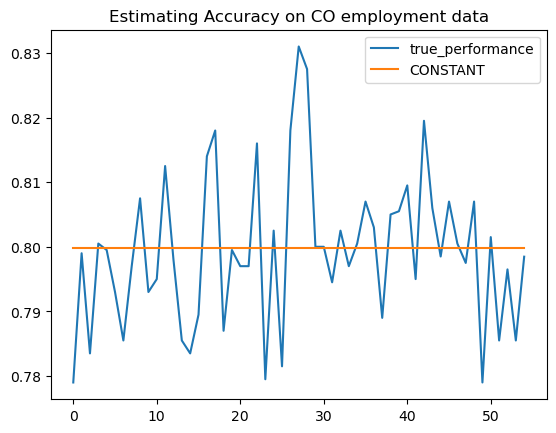

In [15]:
title_text = "Estimating Accuracy on CO employment data"
plt.title(title_text)
plt.plot(results_realized_performance, label='true_performance')
plt.plot(estimation_results_constant, label='CONSTANT')
plt.legend()
plt.show()

### Performance Estimation with ATC

In [16]:
calc2 = ATC(
    y_pred_proba=model_scores,
    y_pred=model_predictions,
    y_true='y_true',
    metric='accuracy', # we need to specify one metric
)
calc2.fit(reference)
estimation_results_atc = []
for chunk in analysis_chunks:
    estimation_results_atc.append(
        calc2.estimate(chunk.data)
    )

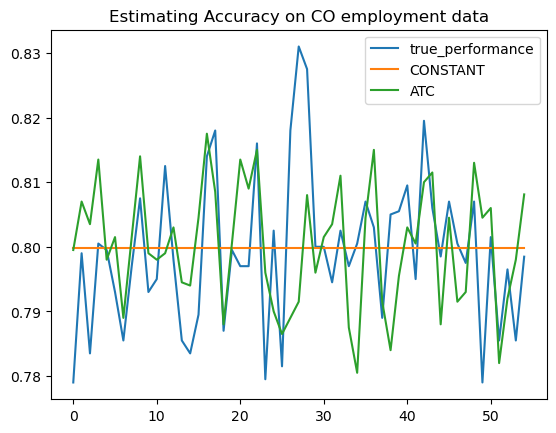

In [17]:
plt.title(title_text)
plt.plot(results_realized_performance, label='true_performance')
plt.plot(estimation_results_constant, label='CONSTANT')
plt.plot(estimation_results_atc, label='ATC')
plt.legend()
plt.show()

### Performance Estimation with DOC

In [18]:
calc3 = DOC(
    y_pred_proba=model_scores,
    y_pred=model_predictions,
    y_true='y_true',
    metric='accuracy', # we need to specify one metric
    features = model_input_features,
    sample_size=2_000
)
calc3.fit(reference)
estimation_results_doc = []
for chunk in analysis_chunks:
    estimation_results_doc.append(
        calc2.estimate(chunk.data)
    )

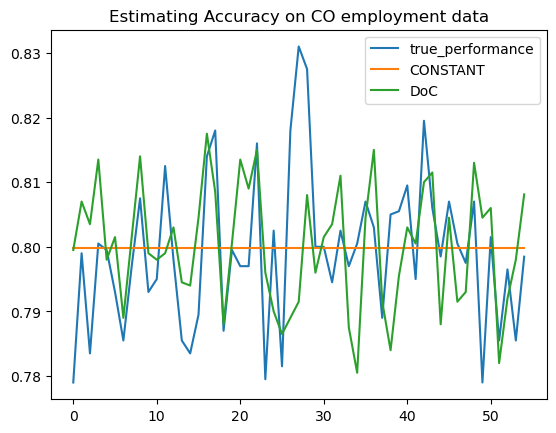

In [19]:
plt.title(title_text)
plt.plot(results_realized_performance, label='true_performance')
plt.plot(estimation_results_constant, label='CONSTANT')
plt.plot(estimation_results_doc, label='DoC')
plt.legend()
plt.show()

### Performance Estimation with Reverse Testing (RT)

Note that as we said in the paper, we are modifying the RT prediction so that on reference the average of RT-mod predictions equal total performance on reference.

Here we are demonstrating the use of the pure RT implementation in order to demonstrate the use of the provided `ReverseTraining` implementation.<br>
It's results can be adjust to that of RT-mod by simply subtracting the appropriate value.

In [20]:
calc4 = ReverseTraining(
    y_pred_proba=model_scores,
    y_pred=model_predictions,
    y_true='y_true',
    metrics =['accuracy'],
    cont_features = ['AGEP'],
    cat_features = [
        'SCHL',
        'MAR',
        'RELP',
        'DIS',
        'ESP',
        'CIT',
        'MIG',
        'MIL',
        'ANC',
        'NATIVITY',
        'DEAR',
        'DEYE',
        'DREM',
        'SEX',
        'RAC1P'
    ]
)
calc4.fit(reference)
estimation_results_rt = []
for chunk in analysis_chunks:
    estimation_results_rt.append(
        calc4.estimate(chunk.data)
    )

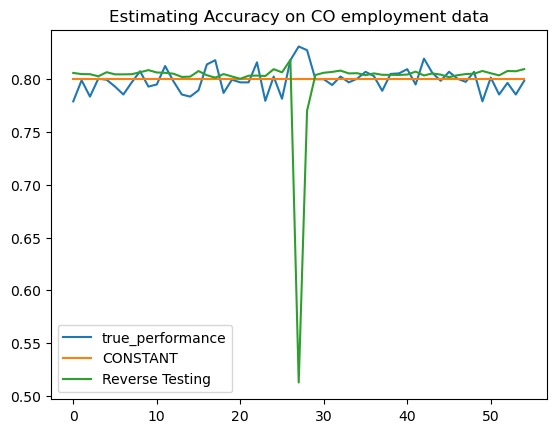

In [21]:
plt.title(title_text)
plt.plot(results_realized_performance, label='true_performance')
plt.plot(estimation_results_constant, label='CONSTANT')
plt.plot(estimation_results_rt, label='Reverse Testing')
plt.legend()
plt.show()

### Performance Estimation with Importance Weighting (IW)

In [22]:
calc5 = ImportanceWeighting(
    y_pred_proba=model_scores,
    y_pred=model_predictions,
    y_true='y_true',
    metrics =['accuracy'],
    cont_features = ['AGEP'],
    cat_features = [
        'SCHL',
        'MAR',
        'RELP',
        'DIS',
        'ESP',
        'CIT',
        'MIG',
        'MIL',
        'ANC',
        'NATIVITY',
        'DEAR',
        'DEYE',
        'DREM',
        'SEX',
        'RAC1P'
    ]
)
calc5.fit(reference)
estimation_results_iw = []
for chunk in analysis_chunks:
    estimation_results_iw.append(
        calc5.estimate(chunk.data)
    )

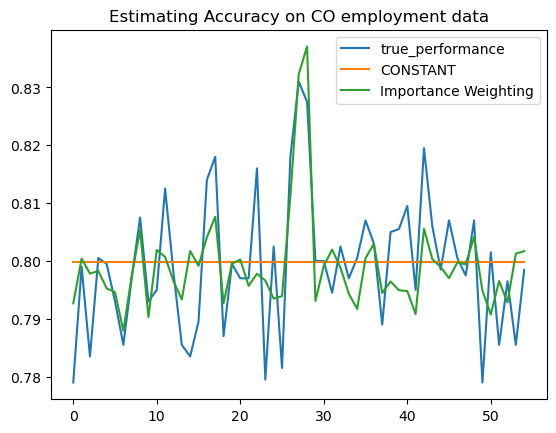

In [23]:
plt.title(title_text)
plt.plot(results_realized_performance, label='true_performance')
plt.plot(estimation_results_constant, label='CONSTANT')
plt.plot(estimation_results_iw, label='Importance Weighting')
plt.legend()
plt.show()

### Performance Estimation with CBPE

In [24]:
calc6 = nml.CBPE(
    y_pred_proba=model_scores,
    y_pred=model_predictions,
    y_true='y_true',
    metrics =['accuracy'],
    problem_type='classification_binary',
    chunker=chunker,
)
calc6.fit(reference)
results6 = calc6.estimate(analysis)

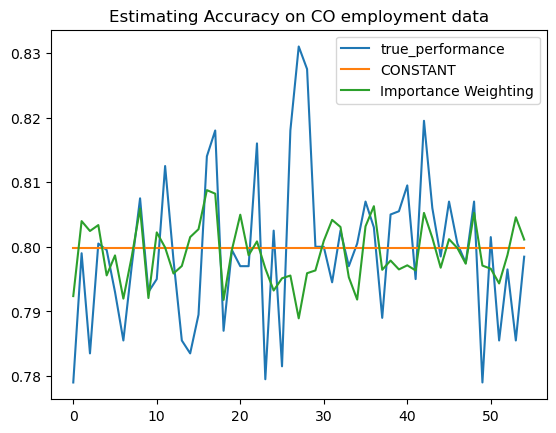

In [25]:
estimation_results_cbpe = list(
    results6.filter(period='analysis').to_df()[('accuracy', 'value')]
)

plt.title(title_text)
plt.plot(results_realized_performance, label='true_performance')
plt.plot(estimation_results_constant, label='CONSTANT')
plt.plot(estimation_results_cbpe, label='Importance Weighting')
plt.legend()
plt.show()

Finally please note that while de describe M-CBPE in the paper we are not releasing an implementation here.<br>
It is available in the sagemaker marketplace and usage instruction can be found [here](https://github.com/NannyML/sagemaker_docs_mcbpe/blob/main/notebooks/NannyML%20-%20MCBPE%20-%20Algorithm.ipynb). The subscription has a free 7 day trial period.
